In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Creamos el dataframe
df = pd.read_csv('ks-projects-201801.csv')

In [3]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


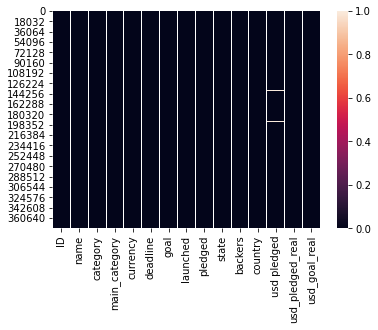

In [5]:
## Buscamos datos nulos
sns.heatmap(df.isnull())

In [6]:
## Contamos datos nulos
missing_vals = df.isnull().sum()
missing_vals  
  #Name no se usara en este estudio y usd_pledged_real es mejor parametro por lo cual este se utilizara en lugar de usd pledged 

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

## Limpieza de datos

In [7]:
## Convertimos las fechas a formato datetime
df['dtDEADLINE'] = pd.to_datetime(df['deadline'],format='%Y-%m-%d')
df['dtLAUNCHED'] = pd.to_datetime(df['launched'],format='%Y-%m-%d %H:%M:%S')

In [8]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,dtDEADLINE,dtLAUNCHED
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,2015-10-09,2015-08-11 12:12:28
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,2017-11-01,2017-09-02 04:43:57
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,2013-02-26,2013-01-12 00:20:50
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,2012-04-16,2012-03-17 03:24:11
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,2015-08-29,2015-07-04 08:35:03


In [9]:
## Sacamos duracion por proyecto
df['duration'] = df['dtDEADLINE'] - df['dtLAUNCHED']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   ID                378661 non-null  int64          
 1   name              378657 non-null  object         
 2   category          378661 non-null  object         
 3   main_category     378661 non-null  object         
 4   currency          378661 non-null  object         
 5   deadline          378661 non-null  object         
 6   goal              378661 non-null  float64        
 7   launched          378661 non-null  object         
 8   pledged           378661 non-null  float64        
 9   state             378661 non-null  object         
 10  backers           378661 non-null  int64          
 11  country           378661 non-null  object         
 12  usd pledged       374864 non-null  float64        
 13  usd_pledged_real  378661 non-null  float64  

In [11]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,dtDEADLINE,dtLAUNCHED,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,2015-10-09,2015-08-11 12:12:28,58 days 11:47:32
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,2017-11-01,2017-09-02 04:43:57,59 days 19:16:03
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,2013-02-26,2013-01-12 00:20:50,44 days 23:39:10
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,2012-04-16,2012-03-17 03:24:11,29 days 20:35:49
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,2015-08-29,2015-07-04 08:35:03,55 days 15:24:57


In [12]:
## Buscamos fechas incorrectas
df['dtLAUNCHED'] < (pd.to_datetime('2009',format='%Y').sum()) ## 7 datos antes de que la compañia se fundara (weird)

AttributeError: 'Timestamp' object has no attribute 'sum'

In [13]:
df.set_index('dtLAUNCHED').resample(rule='A').count() 
## En el año 1970 error de datetime en pandas (https://stackoverflow.com/questions/51587468/datetime-defaulting-to-1970-in-pandas)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,dtDEADLINE,duration
dtLAUNCHED,,,,,,,,,,,,,,,,,
1970-12-31,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
1971-12-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1972-12-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1973-12-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1974-12-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1975-12-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1976-12-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1977-12-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1978-12-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
## Droping those 7 weird values 
df.drop(df[df['dtLAUNCHED'] < pd.to_datetime('2009',format='%Y')].index, inplace=True)

In [15]:
df.set_index('dtLAUNCHED').resample(rule='A').count() ## Done

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,dtDEADLINE,duration
dtLAUNCHED,,,,,,,,,,,,,,,,,
2009-12-31,1329,1329,1329,1329,1329,1329,1329,1329,1329,1329,1329,1329,1329,1329,1329,1329,1329
2010-12-31,10519,10519,10519,10519,10519,10519,10519,10519,10519,10519,10519,10519,10519,10519,10519,10519,10519
2011-12-31,26237,26236,26237,26237,26237,26237,26237,26237,26237,26237,26237,26237,26237,26237,26237,26237,26237
2012-12-31,41165,41163,41165,41165,41165,41165,41165,41165,41165,41165,41165,41165,41163,41165,41165,41165,41165
2013-12-31,44851,44851,44851,44851,44851,44851,44851,44851,44851,44851,44851,44851,44836,44851,44851,44851,44851
2014-12-31,67745,67745,67745,67745,67745,67745,67745,67745,67745,67745,67745,67745,66993,67745,67745,67745,67745
2015-12-31,77300,77300,77300,77300,77300,77300,77300,77300,77300,77300,77300,77300,74919,77300,77300,77300,77300
2016-12-31,57184,57183,57184,57184,57184,57184,57184,57184,57184,57184,57184,57184,56537,57184,57184,57184,57184
2017-12-31,52200,52200,52200,52200,52200,52200,52200,52200,52200,52200,52200,52200,52200,52200,52200,52200,52200


In [16]:
## Dia de lanzamiento
df['Launch_Day'] = df.dtLAUNCHED.dt.day_name()
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,dtDEADLINE,dtLAUNCHED,duration,Launch_Day
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,2015-10-09,2015-08-11 12:12:28,58 days 11:47:32,Tuesday
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,2017-11-01,2017-09-02 04:43:57,59 days 19:16:03,Saturday
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,2013-02-26,2013-01-12 00:20:50,44 days 23:39:10,Saturday
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,2012-04-16,2012-03-17 03:24:11,29 days 20:35:49,Saturday
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,2015-08-29,2015-07-04 08:35:03,55 days 15:24:57,Saturday


In [17]:
## Cambiamos la duracion de timedelta a float -> para poder graficarla
df['duration']=df['duration'].apply(lambda x: x/np.timedelta64(1,'D'))  ## Equivalente a los dias

In [18]:
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,dtDEADLINE,dtLAUNCHED,duration,Launch_Day
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,2015-10-09,2015-08-11 12:12:28,58.491343,Tuesday
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,2017-11-01,2017-09-02 04:43:57,59.802813,Saturday
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,2013-02-26,2013-01-12 00:20:50,44.985532,Saturday
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,2012-04-16,2012-03-17 03:24:11,29.858206,Saturday
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,2015-08-29,2015-07-04 08:35:03,55.642326,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00,2014-10-17,2014-09-17 02:35:30,29.892014,Wednesday
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00,2011-07-19,2011-06-22 03:35:14,26.850532,Wednesday
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00,2010-08-16,2010-07-01 19:40:30,45.180208,Thursday
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00,2016-02-13,2016-01-13 18:13:53,30.240359,Wednesday


## Analis Exploratorio

In [19]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,duration
count,3.786540e+05,3.786540e+05,3.786540e+05,378654.000000,3.748570e+05,3.786540e+05,3.786540e+05,378654.000000
mean,1.074735e+09,4.908160e+04,9.683158e+03,105.619428,7.036860e+03,9.059092e+03,4.545514e+04,33.637689
std,6.190872e+08,1.183402e+06,9.563688e+04,907.193306,7.864047e+04,9.097418e+04,1.152961e+06,12.803077
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02,0.005058
25%,5.382696e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03,29.097639
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947900e+02,6.244650e+02,5.500000e+03,29.689138
75%,1.610155e+09,1.600000e+04,4.076000e+03,56.000000,3.034620e+03,4.050000e+03,1.550000e+04,36.647558
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08,91.962650


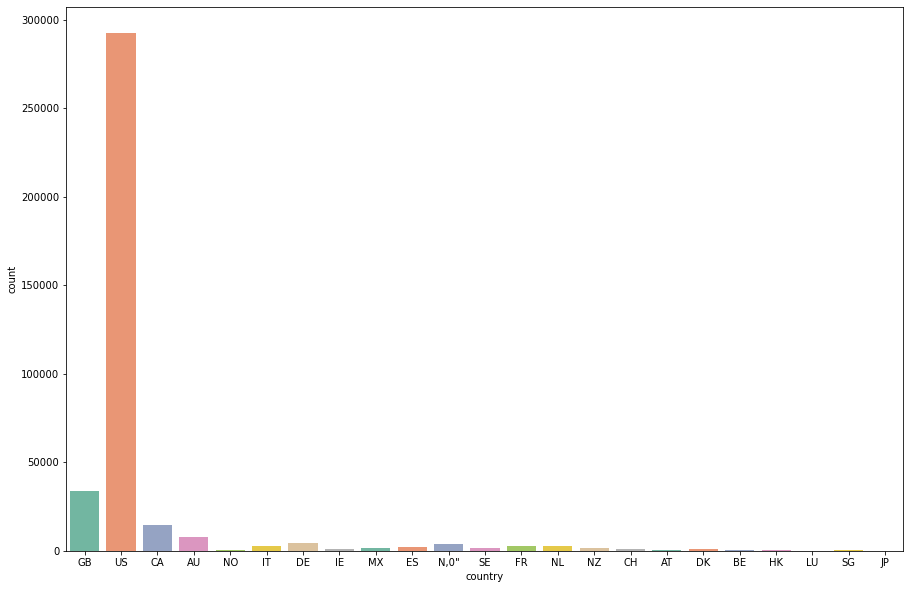

In [20]:
# Por pais
plt.figure(figsize=(15, 10))
sns.countplot(x=df['country'],palette='Set2') 
plt.show()  ## Mucho mas popular en paises angloparlantes

In [21]:
df['country'].drop_duplicates()

0         GB
1         US
10        CA
21        AU
23        NO
61        IT
86        DE
133       IE
149       MX
157       ES
169     N,0"
208       SE
211       FR
310       NL
383       NZ
507       CH
526       AT
688       DK
706       BE
756       HK
1184      LU
1701      SG
5094      JP
Name: country, dtype: object

In [22]:
df.groupby('country')['country'].count().sort_values(ascending=False)


country
US      292621
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         760
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [23]:
# Estado general de todas las campañas (2010 -2018)
df.groupby(['state'])[['state']].count()

,state
state,
canceled,38773
failed,197719
live,2799
successful,133956
suspended,1845
undefined,3562


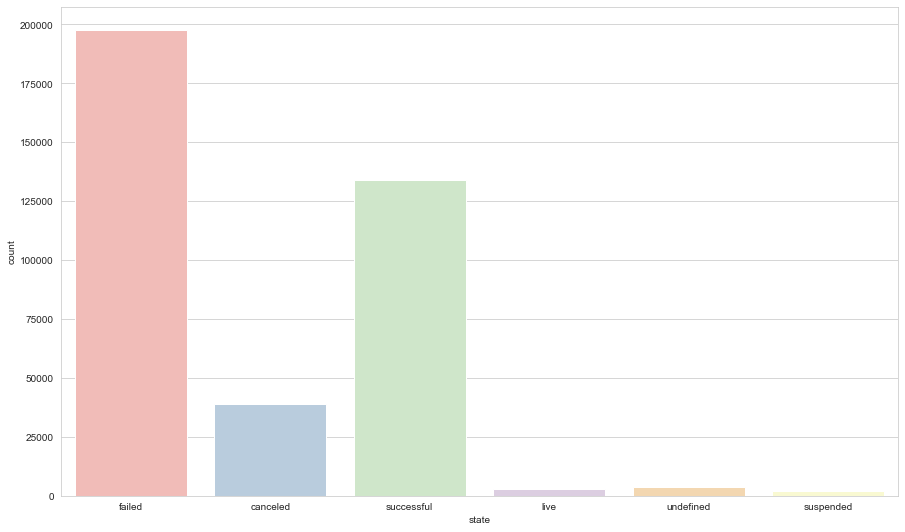

In [24]:
    # Countplot
sns.set_style('whitegrid')
plt.figure(figsize=(15, 9))
sns.countplot(x=df['state'], palette='Pastel1') 
plt.show() ## La mayoria de los proyectos fracasan (***La pregunta ahora seria por cuanto fracasan aproximadamente)

In [25]:
# Categorias de todas las campañas (2010 -2018)
df.groupby(['main_category'])[['main_category']].count()

,main_category
main_category,
Art,28152
Comics,10819
Crafts,8809
Dance,3768
Design,30069
Fashion,22816
Film & Video,63583
Food,24602
Games,35231


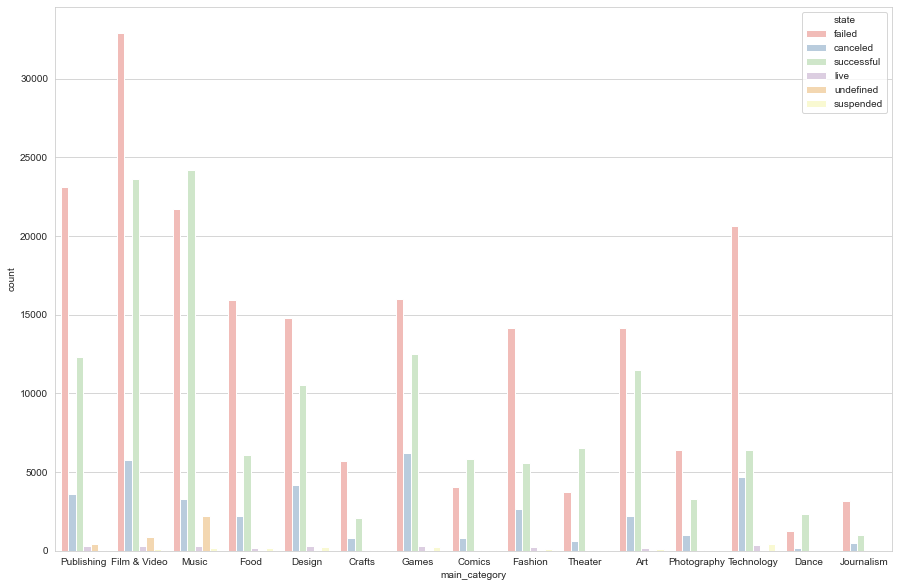

In [26]:
    # Countplot
sns.set_style('whitegrid')
plt.figure(figsize=(15, 10))
sns.countplot(x=df['main_category'], hue=df['state'], palette='Pastel1') 
plt.show() ## Mas proyectos en musica, film y publishing

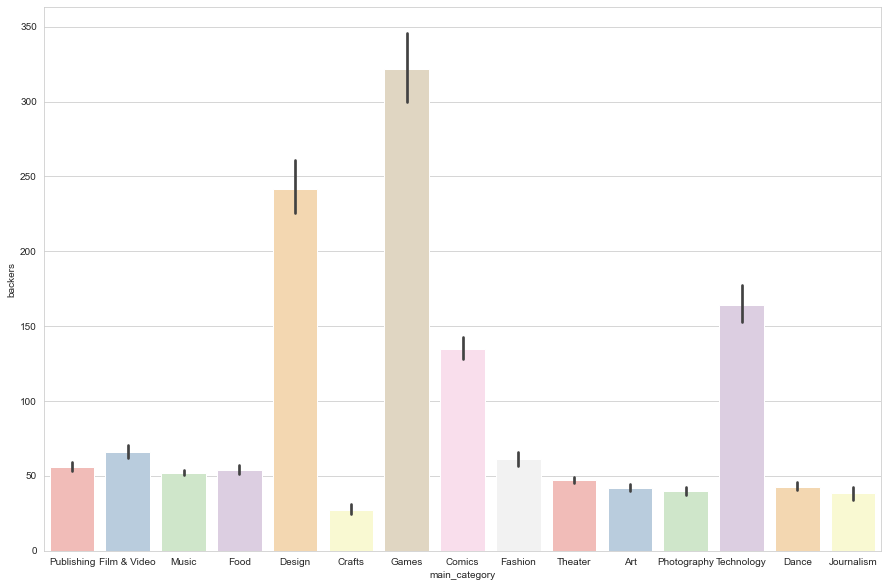

In [27]:
### Backers y su importancia para los proyectos

# Barplot categoria principal y backers
plt.figure(figsize=(15, 10))
sns.barplot(x=df['main_category'], y=df['backers'], palette='Pastel1')  ## Juegos, diseño y tecnologia tiene mas donantes

                                    ##La categorias con el mayor numero de donantes no son las categorias con mas proyectos

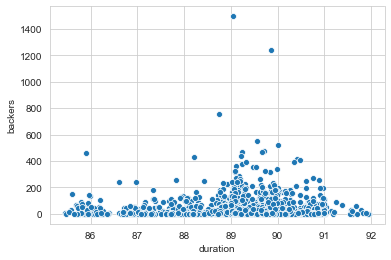

In [72]:
## Duracion
#df['backers']=df['backers'].astype(float)
sns.scatterplot(x=df_finald['duration'], y=df_finald['backers'])  #Esta feo

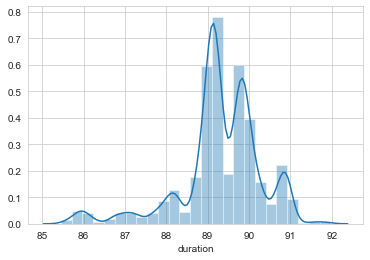

In [73]:
sns.distplot(df_finald['duration'], bins=25)

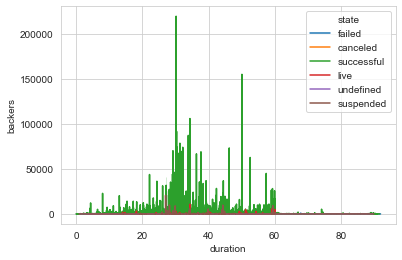

In [77]:
sns.lineplot(data=df, x='duration', y='backers', hue='state')

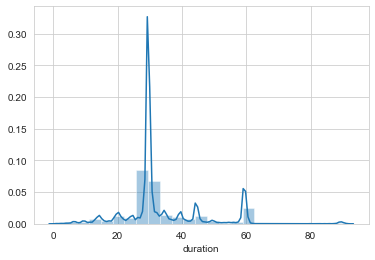

In [29]:
sns.distplot(df['duration'], bins=25)  ##Muchos outliers

In [30]:
def conseguir_zmod(col):
    #Saca la mediana
    mediana = np.median(col)
    
    #Saca el Median Absolute Deviation
    mad = np.median(col.map(lambda x: np.abs(x - mediana)))
    
    # zmod = 0.6745 * (X_i - median of X)/MAD
    zmod= list(col.map(lambda x: 0.6745* (x - mediana)/mad))
    return zmod

In [31]:
zmod_duration = conseguir_zmod(df['duration'])

In [32]:
df_finald=df.iloc[np.where(np.abs(zmod_duration)>=25)]
df_finald

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,dtDEADLINE,dtLAUNCHED,duration,Launch_Day
357,100162622,Circa Vitae requests crowd fundage to record o...,Indie Rock,Music,USD,2009-11-01,2000.0,2009-08-06 23:19:55,80.0,failed,4,US,80.0,80.0,2000.0,2009-11-01,2009-08-06 23:19:55,86.027836,Thursday
673,1003298216,JOHNNY STRANGE,Comics,Comics,USD,2011-09-05,9000.0,2011-06-07 08:57:37,250.0,failed,8,US,250.0,250.0,9000.0,2011-09-05,2011-06-07 08:57:37,89.626655,Tuesday
895,1004436383,Ten Animal Masks in 10 Weeks,Performance Art,Art,USD,2010-05-29,2000.0,2010-02-28 01:17:03,421.0,failed,13,US,421.0,421.0,2000.0,2010-05-29,2010-02-28 01:17:03,89.946493,Sunday
1034,1005217515,Broadway Comes To Denver: Scholarship fund,Theater,Theater,USD,2010-04-03,3600.0,2010-01-03 09:25:12,3661.0,successful,30,US,3661.0,3661.0,3600.0,2010-04-03,2010-01-03 09:25:12,89.607500,Sunday
1059,1005300534,Make COOLRUNNINGS first physical release a rea...,Indie Rock,Music,USD,2011-09-07,2100.0,2011-06-09 23:06:42,3173.0,successful,82,US,3173.0,3173.0,2100.0,2011-09-07,2011-06-09 23:06:42,89.037014,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378552,999422958,Phaxanation & the Dust Kickers: Our Full Lengt...,Music,Music,USD,2011-02-02,2000.0,2010-11-04 21:56:08,78.0,failed,6,US,78.0,78.0,2000.0,2011-02-02,2010-11-04 21:56:08,89.086019,Thursday
378583,999604673,Deep Vein Thrombosis Clot Association - Suppor...,Documentary,Film & Video,USD,2010-10-06,40000.0,2010-07-08 05:46:49,0.0,canceled,0,US,0.0,0.0,40000.0,2010-10-06,2010-07-08 05:46:49,89.759155,Thursday
378593,999656545,Uncanny Valley - a dudley ghost./miasma record...,Indie Rock,Music,USD,2010-07-05,9000.0,2010-04-07 19:35:09,53.0,canceled,2,US,53.0,53.0,9000.0,2010-07-05,2010-04-07 19:35:09,88.183924,Wednesday
378595,999668351,CAT in WATER,Journalism,Journalism,USD,2011-05-27,7500.0,2011-02-25 00:25:31,8462.0,successful,123,US,8462.0,8462.0,7500.0,2011-05-27,2011-02-25 00:25:31,90.982280,Friday


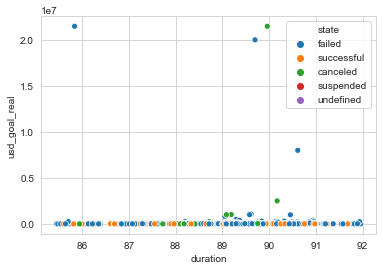

In [69]:
## Goal vs duracion
#df['backers']=df['backers'].astype(float)
sns.scatterplot(x=df['duration'], y=df['usd_goal_real'], hue=df['state'])  #Esta feo

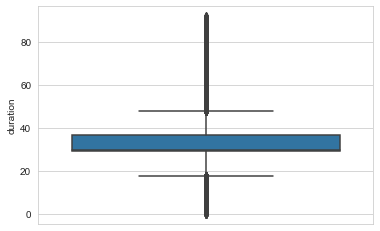

In [78]:
sns.boxplot(data=df, y='duration')

In [35]:
zmod_goal = conseguir_zmod(df['usd_goal_real'])

In [40]:
df_finalg=df.iloc[np.where(np.abs(zmod_goal)<=1000)]
df_finalg

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,dtDEADLINE,dtLAUNCHED,duration,Launch_Day
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,2015-10-09,2015-08-11 12:12:28,58.491343,Tuesday
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,2017-11-01,2017-09-02 04:43:57,59.802813,Saturday
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,2013-02-26,2013-01-12 00:20:50,44.985532,Saturday
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,2012-04-16,2012-03-17 03:24:11,29.858206,Saturday
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,2015-08-29,2015-07-04 08:35:03,55.642326,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00,2014-10-17,2014-09-17 02:35:30,29.892014,Wednesday
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00,2011-07-19,2011-06-22 03:35:14,26.850532,Wednesday
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00,2010-08-16,2010-07-01 19:40:30,45.180208,Thursday
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00,2016-02-13,2016-01-13 18:13:53,30.240359,Wednesday


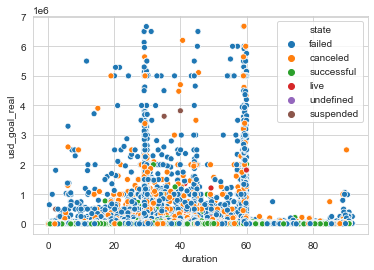

In [41]:
sns.scatterplot(x=df_finalg['duration'], y=df_finalg['usd_goal_real'], hue=df_finalg['state'])  

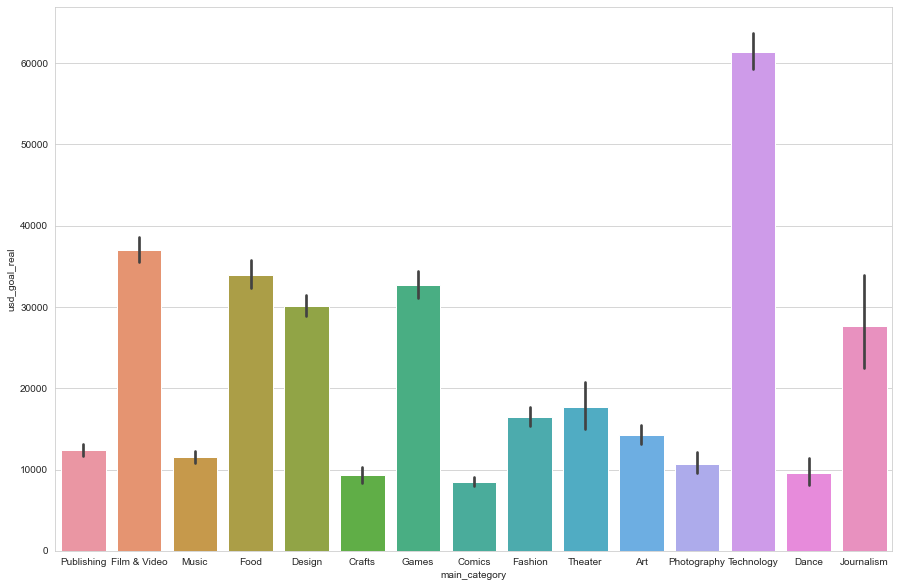

In [46]:
## USD real goal por categoria
plt.figure(figsize=(15, 10))
sns.barplot(x=df_finalg['main_category'], y=df_finalg['usd_goal_real'], data=df_finalg)

In [56]:
df_finalg.groupby('main_category')['usd_goal_real'].sum().sort_values(ascending=False)

main_category
Film & Video    2.351338e+09
Technology      1.994372e+09
Games           1.152570e+09
Design          9.064079e+08
Food            8.360596e+08
Music           5.977928e+08
Publishing      4.931431e+08
Art             4.007620e+08
Fashion         3.746526e+08
Theater         1.927944e+08
Journalism      1.314694e+08
Photography     1.149243e+08
Comics          9.174331e+07
Crafts          8.191721e+07
Dance           3.612882e+07
Name: usd_goal_real, dtype: float64

In [68]:
df.groupby(['main_category', 'state'])[['state']].count()

state
main_category state            
Art           canceled     2221
              failed      14131
              live          194
              successful  11510
              suspended      96
...                         ...
Theater       failed       3708
              live           41
              successful   6534
              suspended      21
              undefined       1

[85 rows x 1 columns]

SyntaxError: EOL while scanning string literal (<ipython-input-67-e8fdc47a3c46>, line 1)